# Exercises
Do your work for this exercise in a jupyter notebook named `feature_engineering` within the `regression-exercises` repo. Add, commit, and push your work.

In [50]:
#imports
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
from pydataset import data

warnings.filterwarnings("ignore")

from sklearn.feature_selection import SelectKBest, f_regression

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# 1. Load the `tips` dataset.

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


# 1a. Create a column named `tip_percentage`. 
- This should be the tip amount divided by the total bill.

In [4]:
tips['tip_percentage'] = round(tips.tip / tips.total_bill, 2)

In [5]:
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,0.06
1,10.34,1.66,Male,No,Sun,Dinner,3,0.16
2,21.01,3.50,Male,No,Sun,Dinner,3,0.17


# 1b. Create a column named `price_per_person`. 
- This should be the total bill divided by the party size.

In [6]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   total_bill      244 non-null    float64 
 1   tip             244 non-null    float64 
 2   sex             244 non-null    category
 3   smoker          244 non-null    category
 4   day             244 non-null    category
 5   time            244 non-null    category
 6   size            244 non-null    int64   
 7   tip_percentage  244 non-null    float64 
dtypes: category(4), float64(3), int64(1)
memory usage: 9.2 KB


In [ ]:
tips['size'] = tips['size'].astype(float)

In [ ]:
tips.info()

`shape` & `size` are Pandas reserve words
- `index`
- `style`

In [7]:
#property/attribute
tips.shape
#row, col

(244, 8)

In [8]:
#property/attribute
tips.size
#rows x col

1952

In [9]:
# this will return the col series
tips['size']

0      2
1      3
2      3
3      2
4      4
      ..
239    3
240    2
241    2
242    2
243    2
Name: size, Length: 244, dtype: int64

In [7]:
# rename size col to tsize to avoid problems with reserve words
tips.rename(columns = {'size': 'tsize'}, inplace = True)

In [8]:
tips.head(3)

,total_bill,tip,sex,smoker,day,time,tsize,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,0.06
1,10.34,1.66,Male,No,Sun,Dinner,3,0.16
2,21.01,3.50,Male,No,Sun,Dinner,3,0.17


In [9]:
tips['price_per_person'] = round(tips.total_bill / tips.tsize, 2)

In [10]:
tips.head(3)

,total_bill,tip,sex,smoker,day,time,tsize,tip_percentage,price_per_person
0,16.99,1.01,Female,No,Sun,Dinner,2,0.06,8.49
1,10.34,1.66,Male,No,Sun,Dinner,3,0.16,3.45
2,21.01,3.50,Male,No,Sun,Dinner,3,0.17,7.00


# 1c. Before using any of the methods discussed in the lesson, which features do you think would be most important for predicting the tip amount? The tip percentage?

I think the features that will be most important for predicting `tip` amount are:
- `day`
- `time`


I think the features that will be most important for predicting `tip_percentage`  are:
- `tsize`
- `time`


In [11]:
def train_validate_test(df, target):
    '''
    this function takes in a dataframe and splits it into 3 samples, 
    a test, which is 20% of the entire dataframe, 
    a validate, which is 24% of the entire dataframe,
    and a train, which is 56% of the entire dataframe. 
    It then splits each of the 3 samples into a dataframe with independent variables
    and a series with the dependent, or target variable. 
    The function returns 3 dataframes and 3 series:
    X_train (df) & y_train (series), X_validate & y_validate, X_test & y_test. 
    '''
    # split df into test (20%) and train_validate (80%)
    train_validate, test = train_test_split(df, test_size=.2, random_state=123)

    # split train_validate off into train (70% of 80% = 56%) and validate (30% of 80% = 24%)
    train, validate = train_test_split(train_validate, test_size=.3, random_state=123)

        
    # split train into X (dataframe, drop target) & y (series, keep target only)
    X_train = train.drop(columns=[target])
    y_train = train[target]
    
    # split validate into X (dataframe, drop target) & y (series, keep target only)
    X_validate = validate.drop(columns=[target])
    y_validate = validate[target]
    
    # split test into X (dataframe, drop target) & y (series, keep target only)
    X_test = test.drop(columns=[target])
    y_test = test[target]
    
    return X_train, y_train, X_validate, y_validate, X_test, y_test

def get_numeric_X_cols(X_train, object_cols):
    '''
    takes in a dataframe and list of object column names
    and returns a list of all other columns names, the non-objects. 
    '''
    numeric_cols = [col for col in X_train.columns.values if col not in object_cols]
    
    return numeric_cols


def min_max_scale(X_train, X_validate, X_test, numeric_cols):
    '''
    this function takes in 3 dataframes with the same columns, 
    a list of numeric column names (because the scaler can only work with numeric columns),
    and fits a min-max scaler to the first dataframe and transforms all
    3 dataframes using that scaler. 
    it returns 3 dataframes with the same column names and scaled values. 
    '''
    # create the scaler object and fit it to X_train (i.e. identify min and max)
    # if copy = false, inplace row normalization happens and avoids a copy (if the input is already a numpy array).


    scaler = MinMaxScaler(copy=True).fit(X_train[numeric_cols])

    #scale X_train, X_validate, X_test using the mins and maxes stored in the scaler derived from X_train. 
    # 
    X_train_scaled_array = scaler.transform(X_train[numeric_cols])
    X_validate_scaled_array = scaler.transform(X_validate[numeric_cols])
    X_test_scaled_array = scaler.transform(X_test[numeric_cols])

    # convert arrays to dataframes
    X_train_scaled = pd.DataFrame(X_train_scaled_array, 
                                  columns=numeric_cols).\
                                  set_index([X_train.index.values])

    X_validate_scaled = pd.DataFrame(X_validate_scaled_array, 
                                     columns=numeric_cols).\
                                     set_index([X_validate.index.values])

    X_test_scaled = pd.DataFrame(X_test_scaled_array, 
                                 columns=numeric_cols).\
                                 set_index([X_test.index.values])

    
    return X_train_scaled, X_validate_scaled, X_test_scaled

In [12]:
def create_dummies(df, object_cols):
    '''
    This function takes in a dataframe and list of object column names,
    and creates dummy variables of each of those columns. 
    It then appends the dummy variables to the original dataframe. 
    It returns the original df with the appended dummy variables. 
    '''
    
    # run pd.get_dummies() to create dummy vars for the object columns. 
    # we will drop the column representing the first unique value of each variable
    # we will opt to not create na columns for each variable with missing values 
    # (all missing values have been removed.)
    dummy_df = pd.get_dummies(df[object_cols], dummy_na=False, drop_first=True)
    
    # concatenate the dataframe with dummies to our original dataframe
    # via column (axis=1)
    df = pd.concat([df, dummy_df], axis=1)

    return df

In [54]:
def get_object_cols(df):
    '''
    This function takes in a dataframe and identifies the columns that are object types
    and returns a list of those column names. 
    '''
    # create a mask of columns whether they are object type or not
    mask = np.array((df.dtypes == "object") | (df.dtypes == "category"))

        
    # get a list of the column names that are objects (from the mask)
    object_cols = df.iloc[:, mask].columns.tolist()
    
    return object_cols

In [55]:
def prep4class(df, target):
    '''
    prep4class takes in a dataframe and target
    - produces a list of object column names
    - splits data into X/y train/validate/test
    - produces a list of numeric column names
    - scales the X_train/validate/test
    returns: split & scaled data.
    '''
    # get object columns names
    object_cols = get_object_cols(df)
    
    # split data 
    X_train, y_train, X_validate, y_validate, X_test, y_test = train_validate_test(df, target)
    
    # get numeric column names
    numeric_cols = get_numeric_X_cols(X_train, object_cols)

    # scale data 
    X_train_scaled, X_validate_scaled, X_test_scaled = min_max_scale(X_train, X_validate, X_test, numeric_cols)
    
    return X_train, X_train_scaled, y_train, X_validate_scaled, y_validate, X_test_scaled, y_test

# 1d. Use all the other numeric features to predict `tip` amount. 
Use select k best and recursive feature elimination to select the top 2 features. 
- What are they?

In [14]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   total_bill        244 non-null    float64 
 1   tip               244 non-null    float64 
 2   sex               244 non-null    category
 3   smoker            244 non-null    category
 4   day               244 non-null    category
 5   time              244 non-null    category
 6   tsize             244 non-null    int64   
 7   tip_percentage    244 non-null    float64 
 8   price_per_person  244 non-null    float64 
dtypes: category(4), float64(4), int64(1)
memory usage: 11.1 KB


In [15]:
# capture the categorical cols
object_cols = get_object_cols(tips)

object_cols

['sex', 'smoker', 'day', 'time']

In [16]:
tips = create_dummies(tips, object_cols)

In [17]:
tips

,total_bill,tip,sex,smoker,day,time,tsize,tip_percentage,price_per_person,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,Female,No,Sun,Dinner,2,0.06,8.49,1,1,0,0,1,1
1,10.34,1.66,Male,No,Sun,Dinner,3,0.16,3.45,0,1,0,0,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0.17,7.00,0,1,0,0,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,0.14,11.84,0,1,0,0,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0.15,6.15,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.20,9.68,0,1,0,1,0,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.07,13.59,1,0,0,1,0,1
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.09,11.34,0,0,0,1,0,1
242,17.82,1.75,Male,No,Sat,Dinner,2,0.10,8.91,0,1,0,1,0,1


In [18]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   total_bill        244 non-null    float64 
 1   tip               244 non-null    float64 
 2   sex               244 non-null    category
 3   smoker            244 non-null    category
 4   day               244 non-null    category
 5   time              244 non-null    category
 6   tsize             244 non-null    int64   
 7   tip_percentage    244 non-null    float64 
 8   price_per_person  244 non-null    float64 
 9   sex_Female        244 non-null    uint8   
 10  smoker_No         244 non-null    uint8   
 11  day_Fri           244 non-null    uint8   
 12  day_Sat           244 non-null    uint8   
 13  day_Sun           244 non-null    uint8   
 14  time_Dinner       244 non-null    uint8   
dtypes: category(4), float64(4), int64(1), uint8(6)
memory usage: 12.5 KB


In [19]:
# split data: train_validate_test(df, 'target')
X_train, y_train, X_validate, y_validate, X_test, y_test = train_validate_test(tips, 'tip')

In [20]:
X_train.shape, y_train.shape, X_validate.shape, y_validate.shape, X_test.shape, y_test.shape

((136, 14), (136,), (59, 14), (59,), (49, 14), (49,))

In [21]:
# capture the numerical cols
numeric_cols = get_numeric_X_cols(X_train, object_cols)
numeric_cols

['total_bill',
 'tsize',
 'tip_percentage',
 'price_per_person',
 'sex_Female',
 'smoker_No',
 'day_Fri',
 'day_Sat',
 'day_Sun',
 'time_Dinner']

In [22]:
# scale the data
X_train_scaled, X_validate_scaled, X_test_scaled = min_max_scale(X_train, X_validate, X_test, numeric_cols)

In [23]:
X_train_scaled.shape, X_validate_scaled.shape, X_test_scaled.shape

((136, 10), (59, 10), (49, 10))

In [24]:
# numeric cols
X_train_scaled.columns.tolist()

['total_bill',
 'tsize',
 'tip_percentage',
 'price_per_person',
 'sex_Female',
 'smoker_No',
 'day_Fri',
 'day_Sat',
 'day_Sun',
 'time_Dinner']

## NOW we are ready to:
1. Make the thing.
2. Fit the thing.
3. Use the thing!

### with SelectKBEST

In [25]:
# parameters: f_regression stats test
f_selector = SelectKBest(f_regression, k=2)

# find the top 2 X-feats correlated with y
f_selector.fit(X_train_scaled, y_train)

# boolean mask of whether the column was selected or not. 
feature_mask = f_selector.get_support()

In [26]:
# boolean mask is a name for an array of booleans
feature_mask

array([ True,  True, False, False, False, False, False, False, False,
       False])

In [27]:
# get list of top K features. 
f_feature = X_train_scaled.iloc[:,feature_mask].columns.tolist()
f_feature

['total_bill', 'tsize']

### with Recursive Feature Elimination: RFE

<AxesSubplot:xlabel='tip', ylabel='tip'>

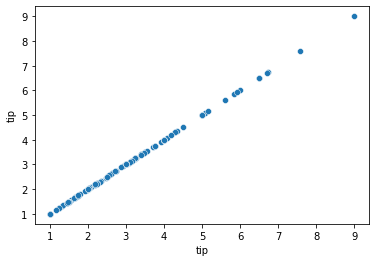

In [28]:
# confirm there is in fact a linear relationship FIRST
sns.scatterplot(x=tips.tip, y=y_train, data=X_train_scaled)

# ABSOLUTELY LINEAR

In [29]:
# initialize the ML algorithm
lm = LinearRegression()

# create the rfe object, indicating the ML object (lm) and the number of features I want to end up with. 
rfe = RFE(lm, 3)

# fit the data using RFE
rfe.fit(X_train_scaled,y_train)  

# get the mask of the columns selected
feature_mask = rfe.support_

# get list of the column names. 
rfe_feature = X_train_scaled.iloc[:,feature_mask].columns.tolist()

In [30]:
rfe_feature

['total_bill', 'tsize', 'tip_percentage']

I decided to change the k=3 for RFE b'c tip_percentage shouldn't be used to predict the tip amount.

### So, it looks like tips are mostly affected by the `total_bill` amount and `t`able `size`.

# 1e. Use all the other numeric features to predict `tip_percentage`. Use select k best and recursive feature elimination to select the top 2 features. What are they?

In [31]:
# capture the categorical cols
object_cols = get_object_cols(tips)
object_cols

['sex', 'smoker', 'day', 'time']

In [32]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   total_bill        244 non-null    float64 
 1   tip               244 non-null    float64 
 2   sex               244 non-null    category
 3   smoker            244 non-null    category
 4   day               244 non-null    category
 5   time              244 non-null    category
 6   tsize             244 non-null    int64   
 7   tip_percentage    244 non-null    float64 
 8   price_per_person  244 non-null    float64 
 9   sex_Female        244 non-null    uint8   
 10  smoker_No         244 non-null    uint8   
 11  day_Fri           244 non-null    uint8   
 12  day_Sat           244 non-null    uint8   
 13  day_Sun           244 non-null    uint8   
 14  time_Dinner       244 non-null    uint8   
dtypes: category(4), float64(4), int64(1), uint8(6)
memory usage: 12.5 KB


In [33]:
# split data: train_validate_test(df, 'target')
X_train, y_train, X_validate, y_validate, X_test, y_test = train_validate_test(tips, 'tip_percentage')

In [34]:
X_train.shape, y_train.shape, X_validate.shape, y_validate.shape, X_test.shape, y_test.shape

((136, 14), (136,), (59, 14), (59,), (49, 14), (49,))

In [35]:
# capture the numerical cols
numeric_cols = get_numeric_X_cols(X_train, object_cols)
numeric_cols

['total_bill',
 'tip',
 'tsize',
 'price_per_person',
 'sex_Female',
 'smoker_No',
 'day_Fri',
 'day_Sat',
 'day_Sun',
 'time_Dinner']

In [36]:
X_train.columns.tolist()

['total_bill',
 'tip',
 'sex',
 'smoker',
 'day',
 'time',
 'tsize',
 'price_per_person',
 'sex_Female',
 'smoker_No',
 'day_Fri',
 'day_Sat',
 'day_Sun',
 'time_Dinner']

In [37]:
# scale the data
X_train_scaled, X_validate_scaled, X_test_scaled = min_max_scale(X_train, X_validate, X_test, numeric_cols)

### SelectKBEST on `tip_percentage`

In [44]:
# parameters: f_regression stats test
f_selector = SelectKBest(f_regression, k=3)

# find the top 2 X-feats correlated with y
f_selector.fit(X_train_scaled, y_train)

# boolean mask of whether the column was selected or not. 
feature_mask = f_selector.get_support()

In [45]:
# boolean mask is a name for an array of booleans
feature_mask

array([ True,  True, False,  True, False, False, False, False, False,
       False])

#### k=2

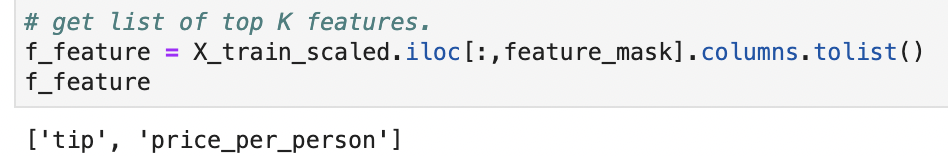

In [46]:
# get list of top K features. 
f_feature = X_train_scaled.iloc[:,feature_mask].columns.tolist()
f_feature

['total_bill', 'tip', 'price_per_person']

### Recursive Feature Elimination: RFE on `tip_percentage`

<AxesSubplot:xlabel='tip_percentage', ylabel='tip_percentage'>

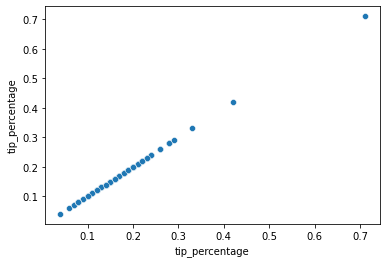

In [47]:
# confirm there is in fact a linear relationship FIRST
sns.scatterplot(x=tips.tip_percentage, y=y_train, data=X_train_scaled)

# ABSOLUTELY LINEAR

In [48]:
# initialize the ML algorithm
lm = LinearRegression()

# create the rfe object, indicating the ML object (lm) and the number of features I want to end up with. 
rfe = RFE(lm, 3)

# fit the data using RFE
rfe.fit(X_train_scaled,y_train)  

# get the mask of the columns selected
feature_mask = rfe.support_

# get list of the column names. 
rfe_feature = X_train_scaled.iloc[:,feature_mask].columns.tolist()

In [49]:
rfe_feature

['total_bill', 'tip', 'tsize']

I again changed my k=3 on **both** FEs b'c it listed `tip` as the highest importance to `tip_percentage`

Now I have:
- `price_per_person` / `tsize`
- `total_bill`


# 1f. Why do you think select k best and recursive feature elimination might give different answers for the top features? Does this change as you change the number of features your are selecting?

B'c they are two *similar* but **different** predictors.

Yes, feature importance is affected by the number of features selected.

# 2. Write a function named `select_kbest` that takes in the predictors (`X`), the target (`y`), and the number of features to select (`k`) and returns the names of the top `k` selected features based on the `SelectKBest` class. 
Test your function with the `tips` dataset. 
- You should see the same results as when you did the process manually.

In [63]:
def select_kbest(X, y, n):
    '''
    select_kbest takes in the 
    predictors (X), 
    the target (y), and 
    the number of features to select (k) and 
    returns the names of the top k selected features based on the SelectKBest class
    '''
    
    # parameters: f_regression stats test
    f_selector = SelectKBest(f_regression, k= n)
    
    # find the top 2 X-feats correlated with y
    f_selector.fit(X, y)
    
    # boolean mask of whether the column was selected or not. 
    feature_mask = f_selector.get_support()
    
    # get list of top K features. 
    f_feature = X.iloc[:,feature_mask].columns.tolist()
    
    return f_feature

# 3. Write a function named `rfe` that takes in the predictors, the target, and the number of features to select. It should return the top k features based on the `RFE` class. 
Test your function with the `tips` dataset. 
- You should see the same results as when you did the process manually.

In [64]:
def rfe(X, y, n):
    '''
    rfe takes in the 
    predictors (X), 
    the target (y), and 
    the number of features to select (k) and 
    returns the names of the top k selected features based on the SelectKBest class
    '''
    
    # initialize the ML algorithm
    lm = LinearRegression()
    
    # create the rfe object, indicating the ML object (lm) and the number of features I want to end up with. 
    rfe = RFE(lm, n)
    
    # fit the data using RFE
    rfe.fit(X,y)  
    
    # get the mask of the columns selected
    feature_mask = rfe.support_
    
    # get list of the column names. 
    rfe_feature = X.iloc[:,feature_mask].columns.tolist()
    
    return rfe_feature

# 4. Load the `swiss` dataset and use all the other features to predict `Fertility`. 
Find the top 3 features using both: 
- select k best 
- recursive feature elimination 
**(use the functions you just built to help you out).**

In [53]:
swiss = data('swiss')
swiss.head(3)

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2


In [57]:
# rename cols to avoid problems formatting
swiss.rename(columns = {'Infant.Mortality': 'infant_mortality', 'Fertility': 'fertility', 'Agriculture': 'agriculture', 'Examination': 'exam', 'Education':'edu', 'Catholic': 'catholic'}, inplace = True)


In [58]:
swiss.head(3)

,fertility,agriculture,exam,edu,catholic,infant_mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2


In [59]:
swiss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fertility         47 non-null     float64
 1   agriculture       47 non-null     float64
 2   exam              47 non-null     int64  
 3   edu               47 non-null     int64  
 4   catholic          47 non-null     float64
 5   infant_mortality  47 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.6+ KB


In [60]:
# Prep the data
# Split the data
# Scale the data
X_train, X_train_scaled, y_train, X_validate_scaled, y_validate, X_test_scaled, y_test = prep4class(swiss, 'fertility')

In [61]:
X_train, X_train_scaled, y_train, X_validate_scaled, y_validate, X_test_scaled, y_test

(              agriculture  exam  edu  catholic  infant_mortality
 Rolle                60.8    16   10      7.72              16.3
 Lavaux               73.0    19    9      2.84              20.0
 Nyone                50.9    22   12     15.14              16.7
 Conthey              85.9     3    2     99.71              15.1
 Yverdon              49.5    15    8      6.10              22.5
 Oron                 71.2    12    1      2.40              21.0
 Cossonay             69.3    22    5      2.82              18.7
 St Maurice           75.9     9    9     99.06              17.8
 Franches-Mnt         39.7     5    5     93.40              20.2
 Orbe                 54.1    20    6      4.20              15.3
 Sarine               45.2    16   13     91.38              24.4
 La Chauxdfnd          7.7    29   11     13.79              20.5
 Neuchatel            17.6    35   32     16.92              23.0
 Monthey              64.9     7    3     98.22              20.2
 Broye    

In [62]:
X_train.shape, X_train_scaled.shape, y_train.shape, X_validate_scaled.shape, y_validate.shape, X_test_scaled.shape, y_test.shape

((25, 5), (25, 5), (25,), (12, 5), (12,), (10, 5), (10,))

In [65]:
# get the features
f_feature = select_kbest(X_train_scaled, y_train, 3)

In [66]:
f_feature

['exam', 'catholic', 'infant_mortality']

<AxesSubplot:xlabel='fertility', ylabel='fertility'>

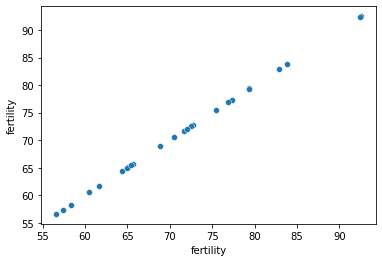

In [67]:
# confirm there is in fact a linear relationship FIRST
sns.scatterplot(x=swiss.fertility, y=y_train, data=X_train_scaled)

# ABSOLUTELY LINEAR

In [68]:
rfe_feature = rfe(X_train_scaled, y_train, 3)

In [69]:
rfe_feature

['agriculture', 'exam', 'infant_mortality']

In [70]:
f_feature, rfe_feature

(['exam', 'catholic', 'infant_mortality'],
 ['agriculture', 'exam', 'infant_mortality'])

In [76]:
# view line as a DF
var_ranks = rfe.ranking_
var_names = X_train_scaled.columns.tolist()

rfe_ranks_df = pd.DataFrame({'Var': var_names, 'Rank': var_ranks})
rfe_ranks_df.sort_values('Rank')

AttributeError: 'function' object has no attribute 'ranking_'